<a href="https://colab.research.google.com/github/akarsh1207/Time-Series-Forecasting-and-Filtering/blob/main/LSTM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Processing of the Time Series Data of Airline Passengers

---



## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

##Importing the Data + Manual Split 101/43 (70:30)

In [ ]:
data = pd.read_csv('AirPassengers.csv')
Initial_train_data= np.array(data.iloc[:-43,1])

In [ ]:
print(Initial_train_data)
print(len(Initial_train_data))

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355]
101


##Preparation of a univariate series having lag of 5 steps (5 months)

In [ ]:
def univariate_series(sequence, n_steps):
  X, y = list(), list()
  for i in range(101):
    end_input = i + n_steps
    if end_input > 100:
     break
    seq_x, seq_y = sequence[i:end_input], sequence[end_input]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
X, y = univariate_series(Initial_train_data,5)

for i in range(len(X)):
  print(X[i],y[i])


[112 118 132 129 121] 135
[118 132 129 121 135] 148
[132 129 121 135 148] 148
[129 121 135 148 148] 136
[121 135 148 148 136] 119
[135 148 148 136 119] 104
[148 148 136 119 104] 118
[148 136 119 104 118] 115
[136 119 104 118 115] 126
[119 104 118 115 126] 141
[104 118 115 126 141] 135
[118 115 126 141 135] 125
[115 126 141 135 125] 149
[126 141 135 125 149] 170
[141 135 125 149 170] 170
[135 125 149 170 170] 158
[125 149 170 170 158] 133
[149 170 170 158 133] 114
[170 170 158 133 114] 140
[170 158 133 114 140] 145
[158 133 114 140 145] 150
[133 114 140 145 150] 178
[114 140 145 150 178] 163
[140 145 150 178 163] 172
[145 150 178 163 172] 178
[150 178 163 172 178] 199
[178 163 172 178 199] 199
[163 172 178 199 199] 184
[172 178 199 199 184] 162
[178 199 199 184 162] 146
[199 199 184 162 146] 166
[199 184 162 146 166] 171
[184 162 146 166 171] 180
[162 146 166 171 180] 193
[146 166 171 180 193] 181
[166 171 180 193 181] 183
[171 180 193 181 183] 218
[180 193 181 183 218] 230
[193 181 183

##Reshaping train data

In [ ]:
X = X.reshape(X.shape[0],X.shape[1],1)


#LSTM Model

##Initilisation of the LSTM

In [ ]:
lstm = tf.keras.models.Sequential()

## First layer + Dropout Regularisation (20%)

In [ ]:
lstm.add(tf.keras.layers.LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (X.shape[1], 1)))
lstm.add(tf.keras.layers.Dropout(0.2))

## Second layer + Dropout Regularisation (20%)

In [ ]:
lstm.add(tf.keras.layers.LSTM(units = 50,activation='relu', return_sequences = True))
lstm.add(tf.keras.layers.Dropout(0.2))

## Third layer + Dropout Regularisation (20%)

In [ ]:
lstm.add(tf.keras.layers.LSTM(units = 50,activation='relu', return_sequences = True))
lstm.add(tf.keras.layers.Dropout(0.2))

## Fourth layer + Dropout Regularisation (20%)

In [ ]:
lstm.add(tf.keras.layers.LSTM(units = 50,activation='relu'))
lstm.add(tf.keras.layers.Dropout(0.2))

##Output Layer

In [ ]:
lstm.add(tf.keras.layers.Dense(units=1))

#Training the LSTM Model
___

##Compiling the LSTM

In [ ]:
lstm.compile(optimizer = 'adam', loss = 'mse')

##Training the LSTM

In [ ]:
lstm.fit(X, y, epochs = 100, batch_size = 2)

Epoch 1/100
48/48 [==============================] - 8s 18ms/step - loss: 36085.1484
Epoch 2/100
48/48 [==============================] - 1s 21ms/step - loss: 6581.8354
Epoch 3/100
48/48 [==============================] - 1s 20ms/step - loss: 6208.9663
Epoch 4/100
48/48 [==============================] - 1s 17ms/step - loss: 3644.1213
Epoch 5/100
48/48 [==============================] - 1s 20ms/step - loss: 6015.4458
Epoch 6/100
48/48 [==============================] - 1s 19ms/step - loss: 4027.3184
Epoch 7/100
48/48 [==============================] - 1s 19ms/step - loss: 4363.2451
Epoch 8/100
48/48 [==============================] - 1s 18ms/step - loss: 6703.9336
Epoch 9/100
48/48 [==============================] - 1s 21ms/step - loss: 5326.0762
Epoch 10/100
48/48 [==============================] - 1s 19ms/step - loss: 5341.5576
Epoch 11/100
48/48 [==============================] - 1s 22ms/step - loss: 5310.9937
Epoch 12/100
48/48 [==============================] - 1s 19ms/step - loss

#Evaluation of the LSTM Model
___

In [ ]:
test_data= np.array(data.iloc[97:,1])

def univariate_test_series(sequence, n_steps):
  X_test, y_test = list(), list()
  for i in range(43):
    end1_input = i + n_steps
    if end1_input > 42:
     break
    seq1_x, seq1_y = sequence[i:end1_input], sequence[end1_input]
    X_test.append(seq1_x)
    y_test.append(seq1_y)
  return np.array(X_test), np.array(y_test)

X_test, y_test = univariate_test_series(test_data,5)

for i in range(len(X_test)):
  print(X_test[i],y_test[i])

[301 356 348 355 422] 465
[356 348 355 422 465] 467
[348 355 422 465 467] 404
[355 422 465 467 404] 347
[422 465 467 404 347] 305
[465 467 404 347 305] 336
[467 404 347 305 336] 340
[404 347 305 336 340] 318
[347 305 336 340 318] 362
[305 336 340 318 362] 348
[336 340 318 362 348] 363
[340 318 362 348 363] 435
[318 362 348 363 435] 491
[362 348 363 435 491] 505
[348 363 435 491 505] 404
[363 435 491 505 404] 359
[435 491 505 404 359] 310
[491 505 404 359 310] 337
[505 404 359 310 337] 360
[404 359 310 337 360] 342
[359 310 337 360 342] 406
[310 337 360 342 406] 396
[337 360 342 406 396] 420
[360 342 406 396 420] 472
[342 406 396 420 472] 548
[406 396 420 472 548] 559
[396 420 472 548 559] 463
[420 472 548 559 463] 407
[472 548 559 463 407] 362
[548 559 463 407 362] 405
[559 463 407 362 405] 417
[463 407 362 405 417] 391
[407 362 405 417 391] 419
[362 405 417 391 419] 461
[405 417 391 419 461] 472
[417 391 419 461 472] 535
[391 419 461 472 535] 622
[419 461 472 535 622] 606


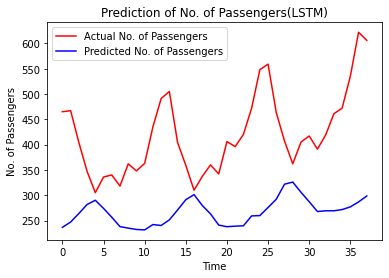

In [ ]:
predicted_passenger_no = lstm.predict(X_test)
plt.plot(y_test, color = 'red', label = 'Actual No. of Passengers')
plt.plot(predicted_passenger_no, color = 'blue', label = 'Predicted No. of Passengers')
plt.title('Prediction of No. of Passengers(LSTM)')
plt.xlabel('Time')
plt.ylabel('No. of Passengers')
plt.legend()
plt.show()